# Visualização de Dados Geoespaciais com Python

**Objetivo:** Este notebook explora como visualizar dados geoespaciais usando as bibliotecas Matplotlib e GeoPandas. Abordaremos a criação de mapas temáticos e técnicas para estilização e personalização de mapas.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
from pathlib import Path

In [3]:
if not os.path.exists('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula04/SAIDA'):
  os.makedirs('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula04/SAIDA')

Path('./').mkdir(parents=True, exist_ok=True)

In [4]:
!pip install geopandas

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
from shapely.geometry import Point

## 1. Plotagem de Dados Geoespaciais com Matplotlib e GeoPandas

GeoPandas integra-se perfeitamente com Matplotlib, facilitando a criação de mapas diretamente a partir de GeoDataFrames.

In [7]:
# **Carregando dados geoespaciais**
gdf = gpd.read_file('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula02/SAIDA/censo_sp_2022.shp')

In [8]:
gdf.head()

,CD_MUN,municipio,censo2000,censo2010,censo2022,tc2000_201,tc2010_202,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,33497.0,33797.0,34687.0,0.09,0.22,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,3684.0,3557.0,4351.0,-0.35,1.69,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26..."
2,3500303,Aguaí,28195.0,32148.0,32072.0,1.32,-0.02,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,7131.0,7584.0,7369.0,0.62,-0.24,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,16190.0,17266.0,17930.0,0.65,0.31,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


**Plotagem simples**
Vamos criar um plot simples do GeoDataFrame usando a função `plot` do GeoPandas.

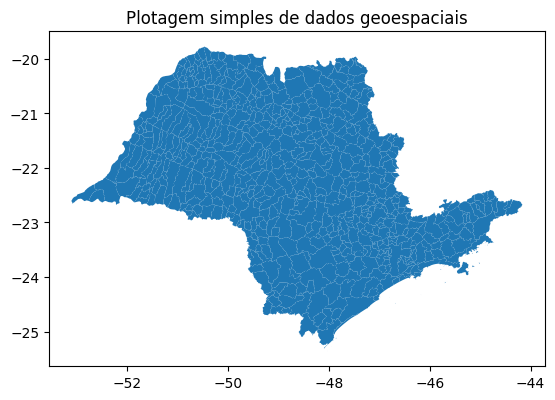

In [9]:
gdf.plot()
plt.title('Plotagem simples de dados geoespaciais')
plt.show()

## 2. Criação de Mapas Temáticos

Mapas temáticos representam dados espaciais com base em atributos específicos, como população, uso da terra, ou qualquer outro dado categórico ou contínuo.

Os **mapas coropléticos** usam variações de cor para representar a densidade ou valores de um atributo.


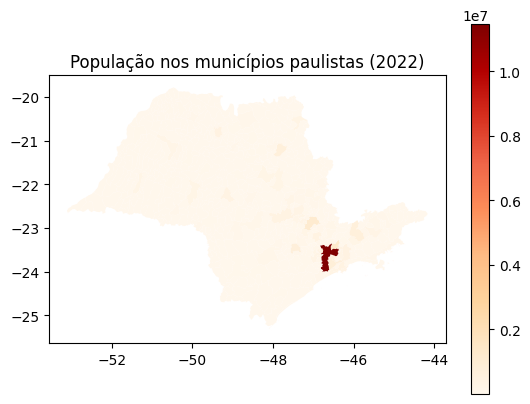

In [10]:
# Exemplo de criação de um mapa coroplético
gdf.plot(column='censo2022', cmap='OrRd', legend=True)
plt.title('População nos municípios paulistas (2022)')
plt.show()

**Mapas de pontos**


Mapas de pontos usam pontos para representar a localização de eventos ou características específicas.

In [11]:
# Coordenadas geográficas (latitude, longitude) de 5 pontos no estado de São Paulo
pontos_SP = [
    Point(-46.6333, -23.5505),  # São Paulo, SP
    Point(-46.3286, -23.9675),  # Santos, SP
    Point(-49.0584, -22.3155),  # Bauru, SP
    Point(-47.0626, -22.9099),  # Campinas, SP
    Point(-49.3797, -20.8243)   # São José do Rio Preto, SP
]

# Criar um GeoDataFrame a partir dos pontos
pontos_gdf = gpd.GeoDataFrame(geometry=pontos_SP, crs="EPSG:4326")

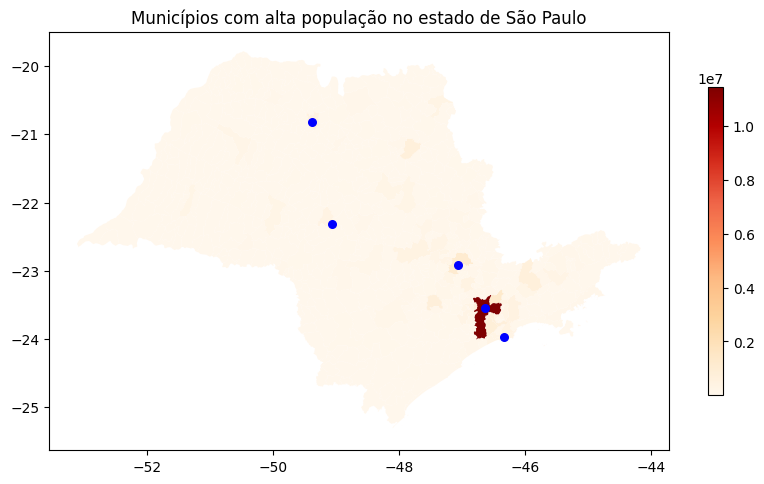

In [33]:
# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o mapa de fundo com a barra de cores ajustada
gdf.plot(column='censo2022', cmap='OrRd', legend=True, ax=ax,
         legend_kwds={'shrink': 0.4,  # Ajuste para reduzir a altura da barra de cores
                      'pad': 0.05,    # Distância da barra de cores
                      'aspect': 20})  # Controla a razão altura/largura

# Plotar os pontos sobre o mapa
pontos_gdf.plot(ax=ax, marker='o', color='blue', markersize=30)

# Adicionar título ao gráfico
plt.title('Municípios com alta população no estado de São Paulo')

plt.show()

## 3. Estilização e personalização de mapas

A estilização permite melhorar a legibilidade e o impacto visual dos mapas.


**Personalização de cores e estilos**

Podemos personalizar a aparência de um mapa ajustando as cores, bordas, e outras propriedades gráficas.

Vamos remover o registro referente ao município de São Paulo.

In [13]:
gdf_sem_sao_paulo = gdf[gdf['CD_MUN']!='3550308']

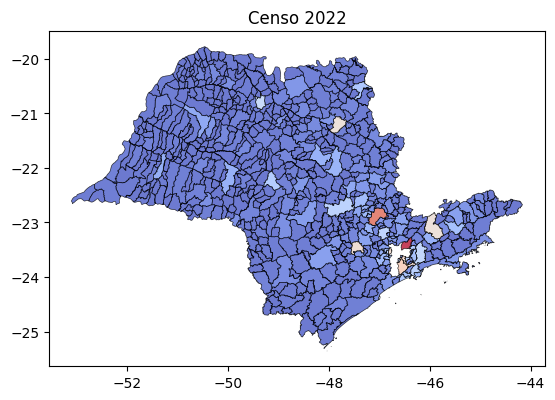

In [14]:
gdf_sem_sao_paulo.plot(column='censo2022', cmap='coolwarm', edgecolor='black', linewidth=0.5, alpha=0.75)
plt.title('Censo 2022')
plt.show()

**Customização de títulos, legendas, e escalas**

A adição de títulos, legendas e escalas personalizadas pode melhorar a compreensão do mapa.

In [15]:
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter

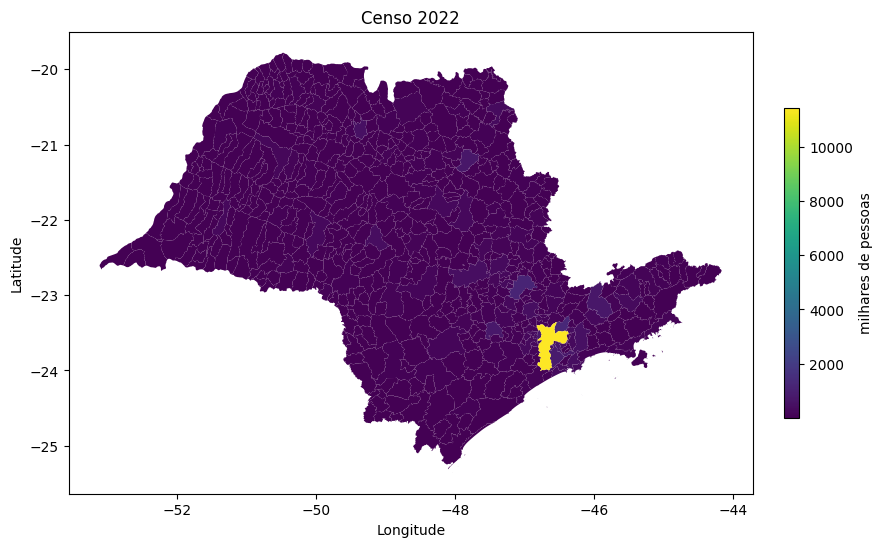

In [16]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
cmap = 'viridis'  # Escolha o cmap desejado
gdf.plot(column='censo2022', cmap=cmap, ax=ax, legend=False)  # Não criar a legenda automaticamente

# Adicionar a barra de cores manualmente
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=gdf['censo2022'].min(), vmax=gdf['censo2022'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)

# Ajustar o rótulo da barra de cores para incluir "milhares de pessoas"
cbar.set_label('milhares de pessoas')

# Aplicar o formatador diretamente com lambda
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))

# Ajustar título e rótulos
plt.title('Censo 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Adicionando a barra de escala

In [17]:
!pip install matplotlib_scalebar geodatasets
from matplotlib_scalebar.scalebar import ScaleBar
from geodatasets import get_path

In [18]:
gdf_albers= gdf.to_crs('+proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=-42 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs +type=crs')
gdf_albers.crs

<Projected CRS: +proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=- ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: Unknown based on Australian Natl & S. Amer. 1969 ellipsoid
- Ellipsoid: Australian Natl & S. Amer. 1969
- Prime Meridian: Greenwich

Veja o código CRS [aqui](https://epsg.io/102033).

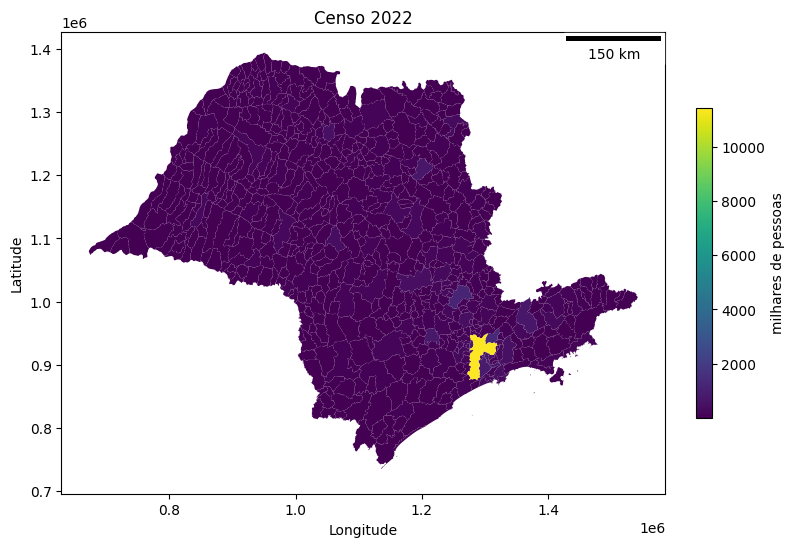

In [32]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
cmap = 'viridis'
gdf_albers.plot(column='censo2022', cmap=cmap, ax=ax, legend=False)

# Adicionar a barra de cores manualmente
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=gdf_albers['censo2022'].min(), vmax=gdf_albers['censo2022'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)

# Ajustar o rótulo da barra de cores para incluir "milhares de pessoas"
cbar.set_label('milhares de pessoas')

# Aplicar o formatador diretamente com lambda
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))

# Ajustar título e rótulos
plt.title('Censo 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.add_artist(ScaleBar(1))

plt.show()

**Adicionando a orientação**

O método annotate() no matplotlib é usado para adicionar anotações em um gráfico, permitindo que você inclua textos e setas em pontos específicos.

Usando o dado em coordenadas planas

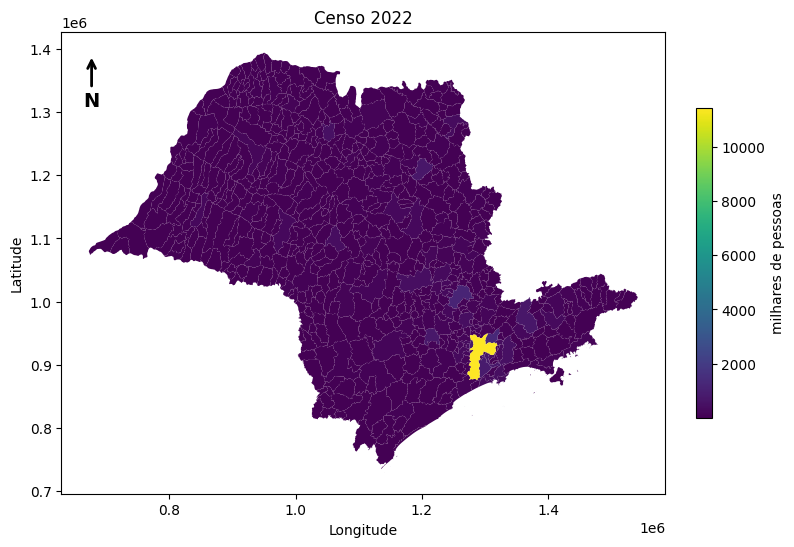

In [20]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
cmap = 'viridis'
gdf_albers.plot(column='censo2022', cmap=cmap, ax=ax, legend=False)

# Adicionar a barra de cores manualmente
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=gdf_albers['censo2022'].min(), vmax=gdf_albers['censo2022'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)

# Ajustar o rótulo da barra de cores para incluir "milhares de pessoas"
cbar.set_label('milhares de pessoas')

# Aplicar o formatador diretamente com lambda
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))

# Ajustar título e rótulos
plt.title('Censo 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adicionar rosa dos ventos (Norte) diretamente
ax.annotate('N', xy=(0.05, 0.95), xytext=(0.05, 0.85),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=14, color='black', fontweight='bold',
            arrowprops=dict(facecolor='black', edgecolor='black',
                            arrowstyle='->', linewidth=2))

plt.show()

Usando o dado em SIRGAS 2000

In [21]:
!pip install cartopy
import cartopy.crs as ccrs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 13.8 MB/s eta 0:00:00


ccrs.PlateCarree(): Este comando vem do pacote cartopy e cria uma projeção geográfica específica chamada Plate Carrée. Essa projeção é uma das mais simples, onde as linhas de latitude e longitude são projetadas como retas, com intervalos iguais entre elas.

**O que é a Projeção Plate Carrée?**

A Plate Carrée é uma projeção cilíndrica equidistante. É frequentemente usada para mapas globais ou regionais quando é necessário que as longitudes e latitudes mantenham um espaçamento uniforme, o que facilita o trabalho com dados geográficos. Cada grau de latitude e longitude representa a mesma distância no mapa, resultando em uma representação proporcional, mas não fiel em termos de área, especialmente em altas latitudes.

Essa projeção é comumente usada em situações onde os dados de coordenadas estão em graus de latitude e longitude (em um sistema de coordenadas geográficas), o que a torna apropriada para exibir muitos tipos de dados espaciais globais.

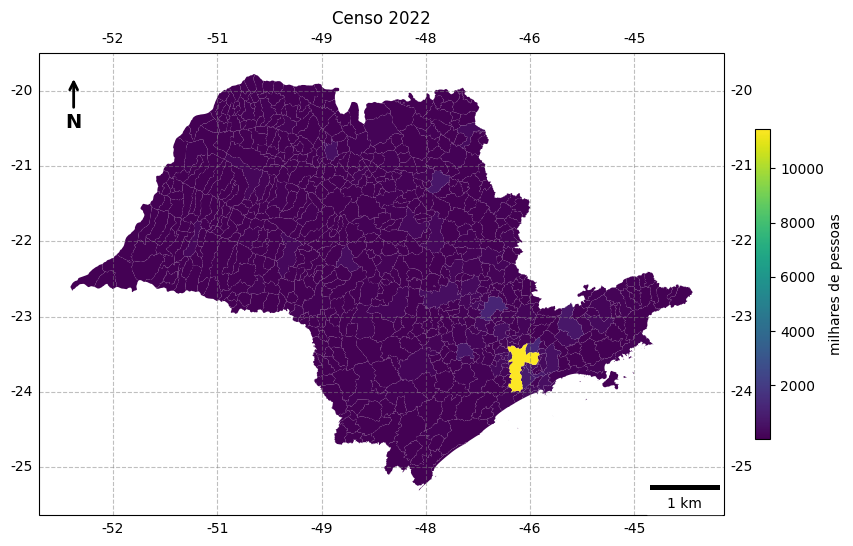

In [22]:
# Configurar o sistema de coordenadas para o mapa
proj = ccrs.PlateCarree()

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

# Plotar os dados no mapa
gdf.plot(column='censo2022', cmap='viridis', ax=ax, legend=False, transform=proj)

# Adicionar a barra de cores manualmente
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf['censo2022'].min(), vmax=gdf['censo2022'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('milhares de pessoas')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.0f}'))

# Ajustar título e rótulos
plt.title('Censo 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adicionar barra de escala
scalebar = ScaleBar(1, location='lower right', units='km')
ax.add_artist(scalebar)

# Adicionar rosa dos ventos (Norte) diretamente
ax.annotate('N', xy=(0.05, 0.95), xytext=(0.05, 0.85),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=14, color='black', fontweight='bold',
            arrowprops=dict(facecolor='black', edgecolor='black',
                            arrowstyle='->', linewidth=2))

# Adicionar grade de coordenadas
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False

# Ajustar a visibilidade dos ticks e labels
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.xlabels_top = False
gl.ylabels_right = False

# Configurar formatação das etiquetas para coordenadas como números inteiros
gl.xformatter = FuncFormatter(lambda x, pos: f'{int(x)}')
gl.yformatter = FuncFormatter(lambda y, pos: f'{int(y)}')

plt.show()

**Mapas interativos com Folium**

Para uma experiência interativa, podemos utilizar a biblioteca Folium, que permite criar mapas que podem ser visualizados no Jupyter Notebook.

In [23]:
import folium
from folium import Choropleth

In [24]:
gdf.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
gdf_wgs = gdf.to_crs(epsg=4326)

In [26]:
# Criar um mapa base
mapa = folium.Map(location=[-22, -47.9], zoom_start=12)

# Converter o GeoDataFrame para GeoJSON
geojson = gdf_wgs.to_json()

# Adicionar uma camada de coropleta
choropleth = Choropleth(
    geo_data=geojson,
    data=gdf_wgs,
    columns=['municipio', 'censo2022'],  # Ajuste para os nomes das colunas no seu GeoDataFrame
    key_on='feature.properties.municipio',  # Ajuste conforme necessário
    fill_color='YlOrRd',  # Escolha a paleta de cores
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Censo 2022'
).add_to(mapa)

# Exibir o mapa
mapa

# # Salvar o mapa em um arquivo HTML para visualização local
# mapa.save('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula04/SAIDA/mapainterativo.html')

Output hidden; open in https://colab.research.google.com to view.